## The Flash Crash Analysis Project

## Under The Guidance of Dr. Albert S. (Pete) Kyle

## BUFN400 2024---University of Maryland


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# The Flash Crash

During the afternoon of May 6, 2010, there was a sudden drop in the stock market and then a fast rebound in prices, all taking place over a time frame less than one hour. This event is commonly called the "Flash Crash".  

This homework is based on transaction-by-transaction data for the the S&P 500 E-Mini future contract and the SPDR ETF SPY on the day of the flash crash. There are four files: trades for the future contract, quotes for the futures contract, trades for the SPY ETF, and quotes for the SPY ETF. These files are available on Canvas.

The S&P 500 E-mini (ESM) is a futures contract which tracks the S&P 500 index. The seemingly strange name "ESM10" has the following explanation: "E"  represents E-mini, "S" represents S&P 500, "M" is an abbreviation for the month of June, and "10" represents the year 2010. The futures contract is cash-settled. This means that its expiration value on June 2010 is the price of the S&P 500 calculated from market prices at the settlement date in June 2010.  The E-mini is structured so that its price is approximately equal to the value  of the S&P 500. One contract has a value equal to 50 times the S&P 500.

The SPY ETF is one of multiple ETFs in the SPDR (Spider) complex.  In the acronym "SPDR", the "SP" represents "Standard & Poor's", and the "DR" represents "Depository Receipt." The SPY is a specific depository receipt which tracks the S&P500 index. The buyer of the SPY holds something equivalent to the basket of stocks underlying the S&P500. The SPY is structured so that the price of one share is approximately one tenth of the S&P 500 index.


# Problem 1: Read and Clean Data

A. Download the data from Canvas. It is located in "BUFN400 / Files / Data". Print a few lines of data. Convert columns to appropriate dtypes. Calculate some basic statistics.

B. Determine the effective granularity of the time stamps (e.g., seconds, milliseconds, microseconds, nanoseconds). Determine also whether the time zones are consistent; if not, make appropriate adjustments to convert all times to New York time. We are interested in trades and quotes during regular stock market hours, which are 9:30 a.m. to 4:00 p.m. New York time.

C. In the ESM10 quote data, fix the issue of missing bid prices, bid quantities, ask prices, and ask prices. (Hint: Consider using the the function *pd.fillna()* with appropriate options.)

D. Explain briefly why other prices and quantities are missing, zero, or very small. (Hint: Keep in mind that, during the Flash Crash, there were ridiculously large and small prices for some stocks due to vanishing market liquidity.  Some stocks, which should have traded at approximately, say, 50.00 (dollars), actually had extreme bid, ask, or trade prices of 0.01 or 9999.99. These prices were not data errors but rather symptoms of the market functioning poorly.)


In [ ]:
# 1.A , 1.B

esm_quotes = pd.read_csv('/content/drive/My Drive/bufn400/ESM10quotes.csv')
esm_trades = pd.read_csv('/content/drive/My Drive/bufn400/ESM10trades.csv')
spy_quotes = pd.read_csv('/content/drive/My Drive/bufn400/SPYraw-quotes.csv')
spy_trades = pd.read_csv('/content/drive/My Drive/bufn400/SPYtrades.csv')

In [ ]:
display(esm_quotes.head())
print()
display(esm_trades.head())
print()
display(spy_quotes.head())
print()
display(spy_trades.head())

,Date-Time,Bid Price,Bid Size,Ask Price,Ask Size
0,2010-05-06T12:00:00.177280000Z,1162.75,281.0,NaN,NaN
1,2010-05-06T12:00:00.177280000Z,NaN,NaN,1163.0,4.0
2,2010-05-06T12:00:00.177280000Z,NaN,NaN,1163.0,44.0
3,2010-05-06T12:00:00.177280000Z,NaN,NaN,1163.0,45.0
4,2010-05-06T12:00:00.177280000Z,1162.75,279.0,NaN,NaN


,Date-Time,Price,Volume
0,2010-05-06T12:00:00.147029000Z,1163.0,4.0
1,2010-05-06T12:00:00.147029000Z,1163.0,10.0
2,2010-05-06T12:00:00.147029000Z,1163.0,1.0
3,2010-05-06T12:00:00.147029000Z,1163.0,20.0
4,2010-05-06T12:00:00.147029000Z,1163.0,1.0


,sym_root,sym_suffix,date,time_m,exchange,bid,ask,bidsize,asksize
0,SPY,,20100506,9:30:00.011000000,Z,116.24,116.26,38,42
1,SPY,,20100506,9:30:00.013000000,Z,116.24,116.26,38,41
2,SPY,,20100506,9:30:00.017000000,Z,116.24,116.26,38,43
3,SPY,,20100506,9:30:00.018000000,B,116.24,116.25,4,2
4,SPY,,20100506,9:30:00.018000000,B,116.24,116.25,3,2


,sym_root,sym_suffix,date,time_m,price,size,exchange
0,SPY,,20100506,9:30:00.044,116.26,200,B
1,SPY,,20100506,9:30:00.046,116.26,200,B
2,SPY,,20100506,9:30:00.046,116.26,100,B
3,SPY,,20100506,9:30:00.046,116.26,100,Z
4,SPY,,20100506,9:30:00.046,116.26,100,Z


In [ ]:
print(esm_quotes.shape)
print(esm_trades.shape)
print(spy_quotes.shape)
print(spy_trades.shape)

(2836292, 5)
(1089253, 3)
(7762857, 9)
(1484979, 7)


In [ ]:
from datetime import timedelta
esm_quotes['Date-Time'] = pd.to_datetime(esm_quotes['Date-Time'])
esm_quotes['Date-Time'] = esm_quotes['Date-Time'] - timedelta(hours = 4)
esm_quotes.head()

,Date-Time,Bid Price,Bid Size,Ask Price,Ask Size
0,2010-05-06 08:00:00.177280+00:00,1162.75,281.0,NaN,NaN
1,2010-05-06 08:00:00.177280+00:00,NaN,NaN,1163.0,4.0
2,2010-05-06 08:00:00.177280+00:00,NaN,NaN,1163.0,44.0
3,2010-05-06 08:00:00.177280+00:00,NaN,NaN,1163.0,45.0
4,2010-05-06 08:00:00.177280+00:00,1162.75,279.0,NaN,NaN


In [ ]:
esm_trades['Date-Time'] = pd.to_datetime(esm_trades['Date-Time'])
esm_trades['Date-Time'] = esm_trades['Date-Time'] - timedelta(hours = 4)
esm_trades.head()

,Date-Time,Price,Volume
0,2010-05-06 08:00:00.147029+00:00,1163.0,4.0
1,2010-05-06 08:00:00.147029+00:00,1163.0,10.0
2,2010-05-06 08:00:00.147029+00:00,1163.0,1.0
3,2010-05-06 08:00:00.147029+00:00,1163.0,20.0
4,2010-05-06 08:00:00.147029+00:00,1163.0,1.0


In [ ]:
spy_quotes = spy_quotes.drop(columns=['sym_suffix'])
spy_trades = spy_trades.drop(columns=['sym_suffix'])

In [ ]:
spy_quotes['date'] = pd.to_datetime(spy_quotes['date'] , format="%Y%m%d")
spy_trades['date'] = pd.to_datetime(spy_trades['date'] , format="%Y%m%d")
spy_quotes['time_m'] = pd.to_datetime(spy_quotes['time_m'] , format = "%H:%M:%S.%f")
spy_trades['time_m'] = pd.to_datetime(spy_trades['time_m'] , format = "%H:%M:%S.%f")

display(spy_quotes.head())
print()
display(spy_trades.head())

,sym_root,date,time_m,exchange,bid,ask,bidsize,asksize
0,SPY,2010-05-06,1900-01-01 09:30:00.011,Z,116.24,116.26,38,42
1,SPY,2010-05-06,1900-01-01 09:30:00.013,Z,116.24,116.26,38,41
2,SPY,2010-05-06,1900-01-01 09:30:00.017,Z,116.24,116.26,38,43
3,SPY,2010-05-06,1900-01-01 09:30:00.018,B,116.24,116.25,4,2
4,SPY,2010-05-06,1900-01-01 09:30:00.018,B,116.24,116.25,3,2


,sym_root,date,time_m,price,size,exchange
0,SPY,2010-05-06,1900-01-01 09:30:00.044,116.26,200,B
1,SPY,2010-05-06,1900-01-01 09:30:00.046,116.26,200,B
2,SPY,2010-05-06,1900-01-01 09:30:00.046,116.26,100,B
3,SPY,2010-05-06,1900-01-01 09:30:00.046,116.26,100,Z
4,SPY,2010-05-06,1900-01-01 09:30:00.046,116.26,100,Z


In [ ]:
spy_quotes['time_m'] = spy_quotes['time_m'].apply(lambda x: x.replace(year=2010, month=5, day=6))
spy_trades['time_m'] = spy_trades['time_m'].apply(lambda x: x.replace(year=2010, month=5, day=6))

In [ ]:
print("ESM10 Quotes\n")
print(esm_quotes.describe())
print()
print("ESM10 Trades\n")
print(esm_quotes.describe())
print()
print("SPY Quotes\n")
print(spy_quotes.describe())
print()
print("SPY Trades\n")
print(spy_trades.describe())

ESM10 Quotes

          Bid Price      Bid Size     Ask Price      Ask Size
count  1.431156e+06  1.431156e+06  1.405194e+06  1.405194e+06
mean   1.139985e+03  3.224880e+02  1.140357e+03  3.396624e+02
std    1.962937e+01  3.353203e+02  1.961831e+01  3.854298e+02
min    1.053000e+03  1.000000e+00  1.053000e+03  1.000000e+00
25%    1.125500e+03  1.020000e+02  1.125750e+03  1.000000e+02
50%    1.147750e+03  2.380000e+02  1.148000e+03  2.380000e+02
75%    1.155750e+03  4.350000e+02  1.156000e+03  4.470000e+02
max    1.164750e+03  6.826000e+03  1.165000e+03  8.084000e+03

ESM10 Trades

          Bid Price      Bid Size     Ask Price      Ask Size
count  1.431156e+06  1.431156e+06  1.405194e+06  1.405194e+06
mean   1.139985e+03  3.224880e+02  1.140357e+03  3.396624e+02
std    1.962937e+01  3.353203e+02  1.961831e+01  3.854298e+02
min    1.053000e+03  1.000000e+00  1.053000e+03  1.000000e+00
25%    1.125500e+03  1.020000e+02  1.125750e+03  1.000000e+02
50%    1.147750e+03  2.380000e+02  1.1480

In [ ]:
#granularity of time stamps
print(esm_quotes['Date-Time'].dtype)
print(esm_trades['Date-Time'].dtype)
print(spy_quotes['time_m'].dtype)
print(spy_trades['time_m'].dtype)

datetime64[ns, UTC]
datetime64[ns, UTC]
datetime64[ns]
datetime64[ns]


Granularity is nanoseconds

In [ ]:
# 1.C
esm_quotes = esm_quotes.fillna(method='ffill')
esm_quotes = esm_quotes.fillna(method='bfill')
esm_quotes.head()

<ipython-input-14-8351c32d2ea1>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  esm_quotes = esm_quotes.fillna(method='ffill')
<ipython-input-14-8351c32d2ea1>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  esm_quotes = esm_quotes.fillna(method='bfill')


,Date-Time,Bid Price,Bid Size,Ask Price,Ask Size
0,2010-05-06 08:00:00.177280+00:00,1162.75,281.0,1163.0,4.0
1,2010-05-06 08:00:00.177280+00:00,1162.75,281.0,1163.0,4.0
2,2010-05-06 08:00:00.177280+00:00,1162.75,281.0,1163.0,44.0
3,2010-05-06 08:00:00.177280+00:00,1162.75,281.0,1163.0,45.0
4,2010-05-06 08:00:00.177280+00:00,1162.75,279.0,1163.0,45.0


1.D) Other quantities are missing , zero , or NaN because

# Problem 2: Overall volume and liquidity

The ESM and SPY are two of the most liquid and actively traded financial instruments in the world.

A. The SPY trades on multiple exchanges. Determine the minimum tick size (minimum price increment) and minimum lot size (minimum quantity unit) for quotes and trades. Calculate the share volume, dollar volume, number of trades, average trade size (dollars and shares),  average bid-ask spread, and average size at the bid and offer on each exchange. Which exchanges appear to offer the mostly liquidity? (Hint: Price and quantity increments for trades may not be the same as for quotes.)

B. The ESM trades only on the CME's Globex market. Determine the minimum tick size and minimum unit for trading and quoting. Calculate its contract volume, dollar volume, number of trades, average trades size (dollars and shares), average bid-ask spread (in price units and basis points), and average size at the bid and offer. (Hint: Keep in mind the factor of 50 used to determine contract size when calculating dollar volume.)

C.  If a trader is looking for liquidity to exchange S&P 500 risk, would they prefer to trade the SPY or the ESM?

In [ ]:
# 2.A
# tick price = |ask - bid|. For trades, it'll be the difference in consecutive trades.

spy_quotes['tick size'] = (spy_quotes['ask'] - spy_quotes['bid'])
temp = spy_quotes[spy_quotes['tick size'] > 0]
min_tick_quotes = temp['tick size'].abs().min()
spy_trades['tick size'] = spy_trades['price'].diff()
temp2 = spy_trades[spy_trades['tick size'] > 0]
min_tick_trades = temp2['tick size'].abs().min()

t3 = spy_quotes[(spy_quotes['asksize'] > 0) & (spy_quotes['bidsize'] > 0)]
min_lot_quotes = min(t3['asksize'].min() , t3['bidsize'].min())
min_lot_trades = spy_trades['size'].min()

print(f"Min tick size for quotes is {min_tick_quotes:.2f} and min tick size for trades is {min_tick_trades}")
print()
print(f"Min lot size for quotes is {min_lot_quotes} and min lot size for trades is {min_lot_trades}")

Min tick size for quotes is 0.01 and min tick size for trades is 9.99999999891088e-05

Min lot size for quotes is 1 and min lot size for trades is 100


In [ ]:
spy_trades.head()

,sym_root,date,time_m,price,size,exchange,tick size
0,SPY,2010-05-06,2010-05-06 09:30:00.044,116.26,200,B,NaN
1,SPY,2010-05-06,2010-05-06 09:30:00.046,116.26,200,B,0.0
2,SPY,2010-05-06,2010-05-06 09:30:00.046,116.26,100,B,0.0
3,SPY,2010-05-06,2010-05-06 09:30:00.046,116.26,100,Z,0.0
4,SPY,2010-05-06,2010-05-06 09:30:00.046,116.26,100,Z,0.0


In [ ]:
cols = {}
cols['shareVol'] = spy_trades['size'].sum()
cols['dolVol'] = ((1/10) * spy_trades['price'] * spy_trades['size']).sum()
cols['numTrades'] = spy_trades.shape[0]
cols['avgTradeSizeD'] = (1/10 * spy_trades['price'] * spy_trades['size']).mean()
cols['avgTradeSizeS'] = spy_trades['size'].mean()
cols['avgBidAskSpread'] = (1/10 * spy_quotes['ask'] - 1/10 * spy_quotes['bid']).mean()
cols['avgSizeBid'] = spy_quotes['bidsize'].mean()
cols['avgSizeOffer'] = spy_quotes['asksize'].mean()

metrics = pd.DataFrame([cols]).T
display(metrics)

,0
shareVol,5.713831e+08
dolVol,6.512242e+09
numTrades,1.484979e+06
avgTradeSizeD,4.385410e+03
avgTradeSizeS,3.847752e+02
avgBidAskSpread,7.206910e-03
avgSizeBid,6.790661e+01
avgSizeOffer,6.857634e+01


In [ ]:
#liquidity can be measured using market depth. Higher the depth more the liquidity

quotes_exchange = spy_quotes.groupby('exchange')
quotes_exchange.head()

,sym_root,date,time_m,exchange,bid,ask,bidsize,asksize,tick size
0,SPY,2010-05-06,2010-05-06 09:30:00.011,Z,116.24,116.26,38,42,0.02
1,SPY,2010-05-06,2010-05-06 09:30:00.013,Z,116.24,116.26,38,41,0.02
2,SPY,2010-05-06,2010-05-06 09:30:00.017,Z,116.24,116.26,38,43,0.02
3,SPY,2010-05-06,2010-05-06 09:30:00.018,B,116.24,116.25,4,2,0.01
4,SPY,2010-05-06,2010-05-06 09:30:00.018,B,116.24,116.25,3,2,0.01
5,SPY,2010-05-06,2010-05-06 09:30:00.018,T,116.24,116.25,46,8,0.01
6,SPY,2010-05-06,2010-05-06 09:30:00.018,B,116.24,116.25,2,2,0.01
7,SPY,2010-05-06,2010-05-06 09:30:00.018,T,116.24,116.25,45,8,0.01
8,SPY,2010-05-06,2010-05-06 09:30:00.018,B,116.24,116.25,1,2,0.01
9,SPY,2010-05-06,2010-05-06 09:30:00.018,P,116.25,116.26,216,36,0.01


In [ ]:
quotes_exchange_depth = quotes_exchange.apply(lambda x: (x['bidsize'] + x['asksize']).mean())
print(quotes_exchange_depth)

exchange
B     33.478563
C     27.772220
I     75.084744
M    669.057233
P    153.997697
T    159.981550
W    341.060495
Z    118.493433
dtype: float64


<ipython-input-19-21b30458fe11>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quotes_exchange_depth = quotes_exchange.apply(lambda x: (x['bidsize'] + x['asksize']).mean())


For exchange M, there is the most liquidity

In [ ]:
# 2.B
esm_quotes['tick size'] = (50 * esm_quotes['Ask Price'] - 50 * esm_quotes['Bid Price'])
t4 = esm_quotes[esm_quotes['tick size'] > 0]
min_tick_quotesE = t4['tick size'].abs().min()
esm_trades['tick size'] = (50 * esm_trades['Price']).diff()
t5 = esm_trades[esm_trades['tick size'] > 0]
min_tick_tradesE = t5['tick size'].abs().min()

min_lot_quotesE = min(esm_quotes['Ask Size'].min() , esm_quotes['Bid Size'].min())
min_lot_tradesE = esm_trades['Volume'].min()

print(f"Min tick size for quotes is {min_tick_quotesE} and min tick size for trades is {min_tick_tradesE}")
print()
print(f"Min lot size for quotes is {min_lot_quotesE} and min lot size for trades is {min_lot_tradesE}")

Min tick size for quotes is 12.5 and min tick size for trades is 12.5

Min lot size for quotes is 1.0 and min lot size for trades is 1.0


In [ ]:
#contract volume, dollar volume, number of trades, average trades size (dollars and shares),
#average bid-ask spread (in price units and basis points), and average size at the bid and offer.

stats = {}

stats['conVol'] = esm_trades['Volume'].mean()
stats['dolVol'] = (50 * esm_trades['Price'] * esm_trades['Volume']).sum()
stats['numTrades'] = esm_trades.shape[0]
stats['avgTradeSizeD'] = (50 * esm_trades['Price'] * esm_trades['Volume']).mean()
stats['avgTradeSizeS'] = esm_trades['Volume'].mean()
stats['avgBidAskSpreadDol'] = (50 * esm_quotes['Ask Price'] - 50 * esm_quotes['Bid Price']).mean()
stats['avgBidAskSpreadBP'] = stats['avgBidAskSpreadDol'] * 10000
stats['avgSizeBid'] = esm_quotes['Bid Size'].mean()
stats['avgSizeOffer'] = esm_quotes['Ask Size'].mean()

mets = pd.DataFrame([stats]).T
display(mets)

,0
conVol,4.912297e+00
dolVol,3.020873e+11
numTrades,1.089253e+06
avgTradeSizeD,2.785801e+05
avgTradeSizeS,4.912297e+00
avgBidAskSpreadDol,1.315373e+01
avgBidAskSpreadBP,1.315373e+05
avgSizeBid,3.412243e+02
avgSizeOffer,3.553217e+02


In [ ]:
# 2.C

esm_depth = (esm_quotes['Ask Size'] + esm_quotes['Bid Size']).mean()
spy_depth = (spy_quotes['asksize'] + spy_quotes['bidsize']).mean()

print(f"ESM10 market depth {esm_depth:.2f} , SPY market depth {spy_depth:.2f}")

ESM10 market depth 696.55 , SPY market depth 136.48


2.C) ESM10 is more liquid than SPY index since ESM10 has a greater market depth than SPY index.

# Problem 3: Intraday breakdown in arbitrage relationship

Arbitrage theory suggests that the price of the SPY should be almost exactly one tenth the price of the ESM because the pricing of the futures contract will only differ from the price of the "cash" market by small adjustments related to interest rates and dividends between May 6, 2010, and the futures expiration in June 2010.

A. Plot ten times the trade price of SPY versus the ESM trade prices on a second-by-second basis. (Hint: Plotting every single trade price or quote price would take a lot of time because there are so many lines of data. To plot every second or every minute, there are some specialized panda's functions which can be used. Alternatively, it may be efficient to convert the *datatime* format into seconds since midnight.)

B. Determine when you think the flash crash started and when it ended, based on patterns of prices. At exactly what time did the market price reach its minimum?

C. Determine whether the arbitrage relationship between the SPY and ESM broke down at some point during the day. If so, determine the timing of the breakdown relative to the timing of the flash crash.


In [ ]:
display(spy_trades.head(5))
print()
display(esm_trades.head())

,sym_root,date,time_m,price,size,exchange,tick size
0,SPY,2010-05-06,2010-05-06 09:30:00.044,116.26,200,B,NaN
1,SPY,2010-05-06,2010-05-06 09:30:00.046,116.26,200,B,0.0
2,SPY,2010-05-06,2010-05-06 09:30:00.046,116.26,100,B,0.0
3,SPY,2010-05-06,2010-05-06 09:30:00.046,116.26,100,Z,0.0
4,SPY,2010-05-06,2010-05-06 09:30:00.046,116.26,100,Z,0.0


,Date-Time,Price,Volume,tick size
0,2010-05-06 08:00:00.147029+00:00,1163.0,4.0,NaN
1,2010-05-06 08:00:00.147029+00:00,1163.0,10.0,0.0
2,2010-05-06 08:00:00.147029+00:00,1163.0,1.0,0.0
3,2010-05-06 08:00:00.147029+00:00,1163.0,20.0,0.0
4,2010-05-06 08:00:00.147029+00:00,1163.0,1.0,0.0


In [ ]:
spy_trades_second = spy_trades.copy(deep = True)
spy_trades_second['time_m'] = spy_trades_second['time_m'].dt.floor('S')
data1 = spy_trades_second.groupby('time_m')['price'].mean()
display(data1.head())

<ipython-input-24-2c5f1cd21cc2>:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  spy_trades_second['time_m'] = spy_trades_second['time_m'].dt.floor('S')


,price
time_m,
2010-05-06 09:30:00,116.275624
2010-05-06 09:30:01,116.290151
2010-05-06 09:30:02,116.275526
2010-05-06 09:30:03,116.269535
2010-05-06 09:30:04,116.290833


In [ ]:
esm_trades_second = esm_trades.copy(deep = True)
esm_trades_second['Date-Time'] = esm_trades_second['Date-Time'].dt.floor('S')
data2 = esm_trades_second.groupby('Date-Time')['Price'].mean()
display(data2.head())

<ipython-input-25-12ab66b8712d>:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  esm_trades_second['Date-Time'] = esm_trades_second['Date-Time'].dt.floor('S')


,Price
Date-Time,
2010-05-06 08:00:00+00:00,1162.994048
2010-05-06 08:00:01+00:00,1163.000000
2010-05-06 08:00:02+00:00,1162.750000
2010-05-06 08:00:03+00:00,1162.800000
2010-05-06 08:00:05+00:00,1162.750000


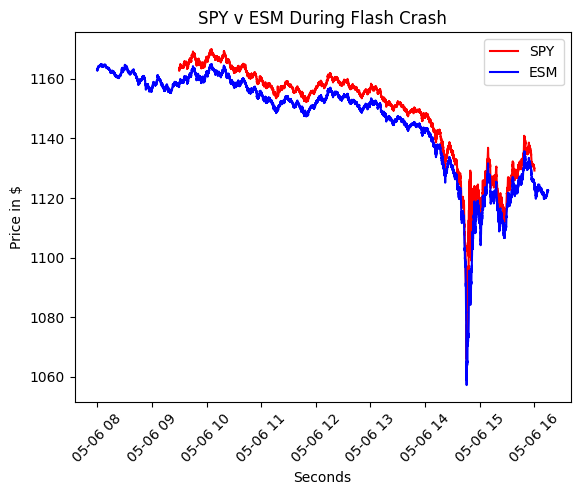

In [ ]:
plt.plot((10 * data1) , color = 'red' , label = 'SPY')
plt.plot(data2 , color = 'blue' , label = 'ESM')
plt.title("SPY v ESM During Flash Crash")
plt.xlabel("Seconds")
plt.xticks(rotation = 45)
plt.ylabel("Price in $")
plt.legend()
plt.show()

3.B) I would say it started around 2:15PM and went back up around 3:15PM based on the graph above

3.C) We see a gap between SPY and ESM until 2PM where SPY index starts getting closer and matching up with ESM and then leading to a crash. I would say 15-20 minutes before the crash we could see the two index's matching up.

# Problem 4: Intraday liquidity

A. Plot volume, bid-ask spreads, and sizes at the bid and ask in both markets on a minute-by-minute (or second-by-second) basis. Based on my own research, a potentially good measure of market liqidity is  

$$
\frac{0.50 \cdot (Q_{ask} + Q_{bid}) \cdot P_{midpoint}^2}{P_{ask} - P_{bid}}
$$

Theoretically, this quantity measures the quantity of dollars bought or sold to move prices one dollar. The quantities should be adjusted by the factor of 50 and factor of 10 needed to convert contracts or shares into dollars worth of the S&P 500 index. Calculate this measure of liquidity on a minute-by-minute or second-by-second basis. (Hint: Consider use a log scale for the vertical axis.)

B. Were price changes reasonably continuous during the day, or were there significant instantaneous jumps in prices of more than one tick, in both the futures market and the most active stock exchanges?

C. Would it be reasonable to infer that a breakdown in liquidity caused the flash crash, or vice versa?

In [ ]:
# 4.A
display(spy_trades_second.head())

spy_quotes_second = spy_quotes.copy(deep = True)
spy_quotes_second['time_m'] = spy_quotes_second['time_m'].dt.floor('s')
spySpread = spy_quotes_second.groupby('time_m').apply(lambda x : ((10 * x['ask']) - (10 * x['bid'])).mean())
spyVol = spy_trades_second.groupby('time_m')['size'].sum()
spyAsk = spy_quotes_second.groupby('time_m')['asksize'].mean()
spyBid = spy_quotes_second.groupby('time_m')['bidsize'].mean()

,sym_root,date,time_m,price,size,exchange,tick size
0,SPY,2010-05-06,2010-05-06 09:30:00,116.26,200,B,NaN
1,SPY,2010-05-06,2010-05-06 09:30:00,116.26,200,B,0.0
2,SPY,2010-05-06,2010-05-06 09:30:00,116.26,100,B,0.0
3,SPY,2010-05-06,2010-05-06 09:30:00,116.26,100,Z,0.0
4,SPY,2010-05-06,2010-05-06 09:30:00,116.26,100,Z,0.0


<ipython-input-27-c08cb11b7124>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  spySpread = spy_quotes_second.groupby('time_m').apply(lambda x : ((10 * x['ask']) - (10 * x['bid'])).mean())


In [ ]:
display(esm_trades_second.head())

esm_quotes_second = esm_quotes.copy(deep = True)
esm_quotes_second['Date-Time'] = esm_quotes_second['Date-Time'].dt.floor('s')
eSpread = esm_quotes_second.groupby('Date-Time').apply(lambda x : ((50 * x['Ask Price']) - (50 * x['Bid Price'])).mean())
eVol = esm_trades_second.groupby('Date-Time').apply(lambda x : (x['Volume'] * 50 * x['Price']).sum())
eAsk = esm_quotes_second.groupby('Date-Time')['Ask Size'].mean()
eBid = esm_quotes_second.groupby('Date-Time')['Bid Size'].mean()

,Date-Time,Price,Volume,tick size
0,2010-05-06 08:00:00+00:00,1163.0,4.0,NaN
1,2010-05-06 08:00:00+00:00,1163.0,10.0,0.0
2,2010-05-06 08:00:00+00:00,1163.0,1.0,0.0
3,2010-05-06 08:00:00+00:00,1163.0,20.0,0.0
4,2010-05-06 08:00:00+00:00,1163.0,1.0,0.0


<ipython-input-36-956ffad4ace5>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eSpread = esm_quotes_second.groupby('Date-Time').apply(lambda x : ((50 * x['Ask Price']) - (50 * x['Bid Price'])).mean())
<ipython-input-36-956ffad4ace5>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eVol = esm_trades_second.groupby('Date-Time').apply(lambda x : (x['Volume'] * 50 * x['Price']).sum())


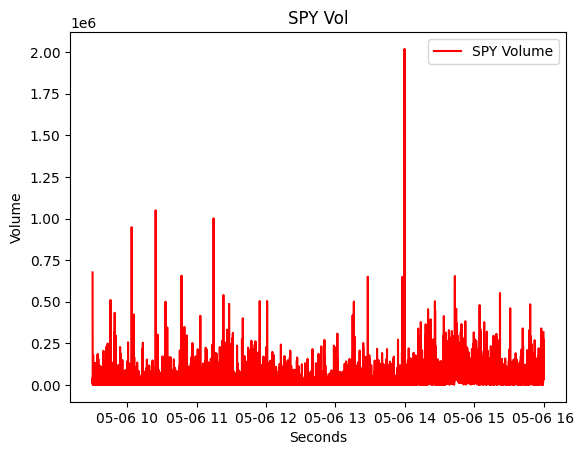

In [ ]:
plt.plot(spyVol , color = 'red' , label = 'SPY Volume')
plt.title("SPY Vol")
plt.xlabel("Seconds")
plt.ylabel("Volume")
plt.legend()
plt.show()

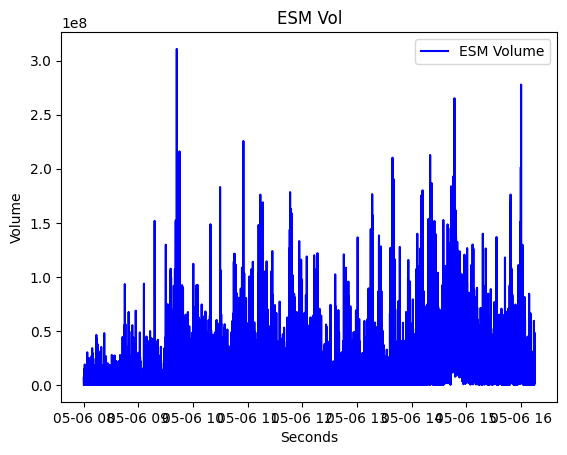

In [ ]:
plt.plot(eVol , color = 'blue' , label = 'ESM Volume')
plt.title("ESM Vol")
plt.xlabel("Seconds")
plt.ylabel("Volume")
plt.legend()
plt.show()

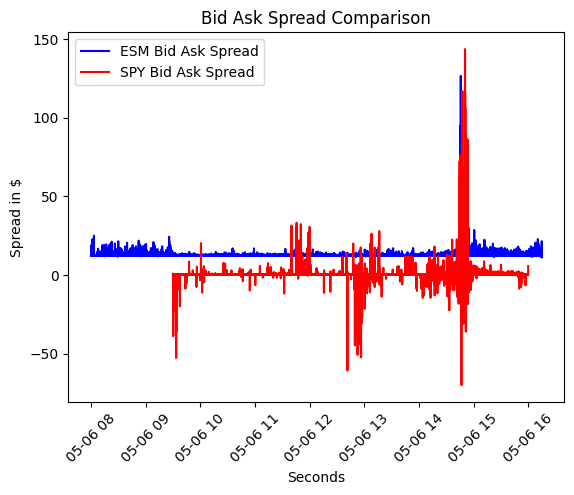

In [ ]:
plt.plot(eSpread , color = 'blue' , label = 'ESM Bid Ask Spread')
plt.plot(spySpread , color = 'red' , label = 'SPY Bid Ask Spread')
plt.legend()
plt.title('Bid Ask Spread Comparison')
plt.xlabel('Seconds')
plt.ylabel('Spread in $')
plt.xticks(rotation = 45)
plt.show()

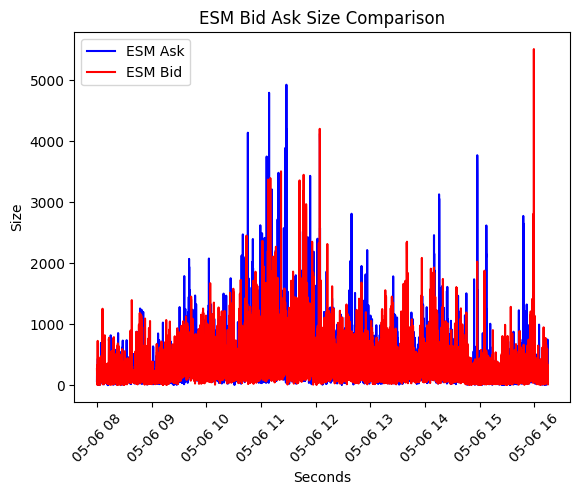

In [ ]:
plt.plot(eAsk , color = 'blue' , label = 'ESM Ask')
plt.plot(eBid , color = 'red' , label = 'ESM Bid')
plt.legend()
plt.title('ESM Bid Ask Size Comparison')
plt.xlabel('Seconds')
plt.ylabel('Size')
plt.xticks(rotation = 45)
plt.show()

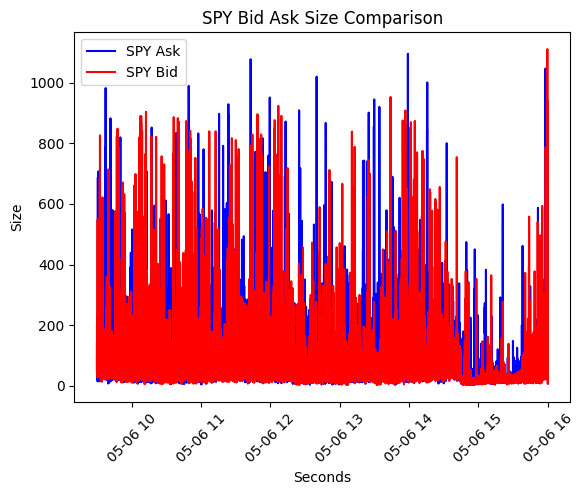

In [ ]:
plt.plot(spyAsk , color = 'blue' , label = 'SPY Ask')
plt.plot(spyBid , color = 'red' , label = 'SPY Bid')
plt.legend()
plt.title('SPY Bid Ask Size Comparison')
plt.xlabel('Seconds')
plt.ylabel('Size')
plt.xticks(rotation = 45)
plt.show()

$$
\frac{0.50 \cdot (Q_{ask} + Q_{bid}) \cdot P_{midpoint}^2}{P_{ask} - P_{bid}}
$$

In [ ]:
#esm

quantity = (0.5 * (esm_quotes_second.groupby('Date-Time')['Ask Size'].sum() + esm_quotes_second.groupby('Date-Time')['Bid Size'].sum()))
quantity = quantity * (esm_quotes_second.groupby('Date-Time').apply(lambda x : (50 * x['Ask Price'] + 50 * x['Bid Price']) / 2))
quantity = quantity / ((esm_quotes_second.groupby('Date-Time')['Ask Price'].mean() * 50) - (esm_quotes_second.groupby('Date-Time')['Bid Price'].mean() * 50))

<ipython-input-33-5a1ef3ed2ecd>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quantity = quantity * (esm_quotes_second.groupby('Date-Time').apply(lambda x : (50 * x['Ask Price'] + 50 * x['Bid Price']) / 2))


In [ ]:
#spy

spyQuantity = (0.5 * (spy_quotes_second.groupby('time_m')['asksize'].sum() + spy_quotes_second.groupby('time_m')['bidsize'].sum()))
spyQuantity = spyQuantity * (spy_quotes_second.groupby('time_m').apply(lambda x : (10 * x['ask'] + 10 * x['bid']) / 2))
spyQuantity = spyQuantity / ((spy_quotes_second.groupby('time_m')['ask'].mean() * 10) - (spy_quotes_second.groupby('time_m')['bid'].mean() * 10))

<ipython-input-34-880551f6970b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  spyQuantity = spyQuantity * (spy_quotes_second.groupby('time_m').apply(lambda x : (10 * x['ask'] + 10 * x['bid']) / 2))


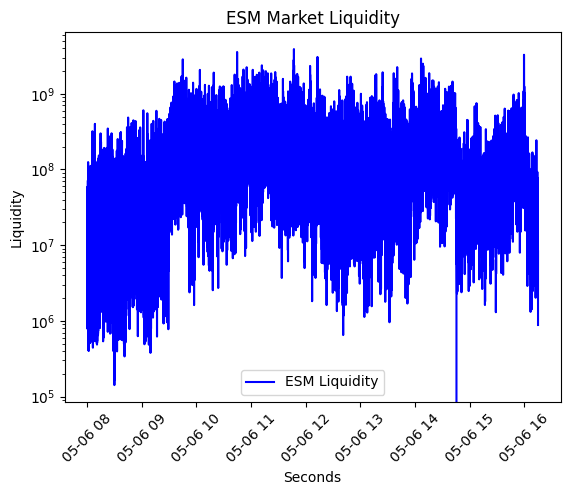

In [ ]:
plt.plot(quantity.groupby('Date-Time').mean() , color = 'blue' , label = 'ESM Liquidity')
plt.legend()
plt.title('ESM Market Liquidity')
plt.xlabel("Seconds")
plt.ylabel("Liquidity")
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

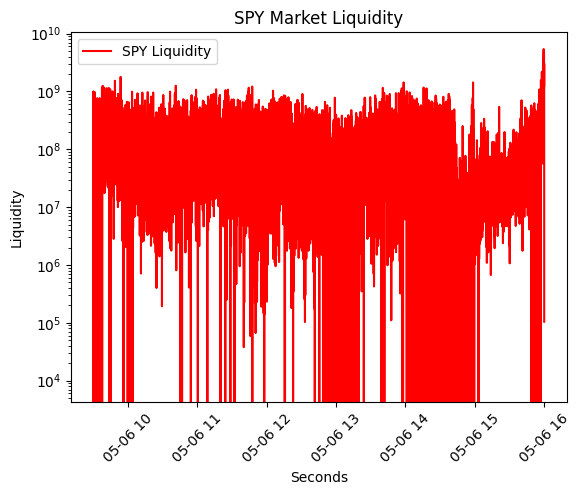

In [ ]:
plt.plot(spyQuantity.groupby('time_m').mean() , color = 'red' , label = 'SPY Liquidity')
plt.legend()
plt.title('SPY Market Liquidity')
plt.xlabel("Seconds")
plt.ylabel("Liquidity")
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

4.B) During the 2010 Flash Crash, price changes were highly discontinuous in both the futures market and stock exchanges, with significant instantaneous jumps exceeding one tick size, driven by extreme volatility and liquidity evaporation

4.C) I would say breakdown of the arbitrage relationship caused the flash crash which could be explained with liquidity so I would say yes.